# Copule Gaussienne et instants de défaut
On considère la modélisation suivante: soit $\tau_1, \dots, \tau_n$ des variables aléatoires exponentielles de paramètre $\lambda_i > 0$ qui représentent $n$ instants de défaut (instant de défaillance d'un composant en fiabilité, instant de défaut d'une entreprise en finance, instant de mutation en biologie, etc). On suppose que ces $n$ instants sont corrélés par la copule Gaussienne $C$ de matrice de covariance $\Sigma_{i,i} = 1$ et $\Sigma_{i,j} = \rho \in [0,1]$ pour $i \neq j$. 

Dans un premier temps on s'intéresse à la simulation du vecteur $U$ correspondant à la copule $C$ i.e. pour tout $i \in \{1,\dots,n\}, U_i \sim \mathcal{U}([0,1])$ et $C(u_1,\dots,u_n) = \mathbf{P}[U_1 \le u_1,\dots,U_n\le u_n]$. Montrer que 
$$
    \forall i \in \{1,\dots,n\}, \quad U_i = \Phi\bigl(\sqrt{\rho} G_0 + \sqrt{1 - \rho} G_i \bigr),
$$
où $(G_0,G_1,\dots, G_n)$ est un vecteur normal standard de $\mathbf{R}^{n+1}$ et $\Phi$ est la fonction de répartition gaussienne standard (fonction `pnorm`). 

En utilisant cette représentation, écrire le code d'une fonction qui renvoie une réalisation $U = (U_1, \dots, U_n) \in [0,1]^n$.

Puis écrire une fonction qui prend 2 arguments `n` et `rho` et qui renvoie une liste (`list`) qui contient 3 éléments: l'entier `n`, le réel `rho` et une fonction `rand` qui ne prend pas d'arguments et qui renvoie une réalisation $U$. Dans toute la suite `n` est la dimension de la copule qui sera par exemple 10, et non le nombre de réalisations considérées. 

In [1]:
cop_gauss <- function(n, rho) {
    copule <- list(n = n, rho = rho)
    copule$rand <- function() {
        g <- sqrt(rho) * rnorm(1) + sqrt(1-rho) * rnorm(n)
        u <- pnorm(g)
        return(u)
    }     
    return(copule)
}
cop <- cop_gauss(n=2, rho = 0.)
cop$rand()    # exemple d'une réalisation du vecteur (U_1, U_2)

[1] 0.4912192 0.1658964

Réaliser le graphe suivant en utilisant 2000 réalisations obtenues par la copule Gaussienne de paramètre $\rho = 0,2$ et par celle de paramètre $\rho = 0,8$. Pour information la couleur est `rgb(0,0,1,alpha = 0.4)` et le point `pch = 20`. On trace ici la projection des réalisations sur les 2 premières dimensions, explorer graphiquement les autres dimensions lorsque $n \ge 2$.
![image](cop_gauss.png)

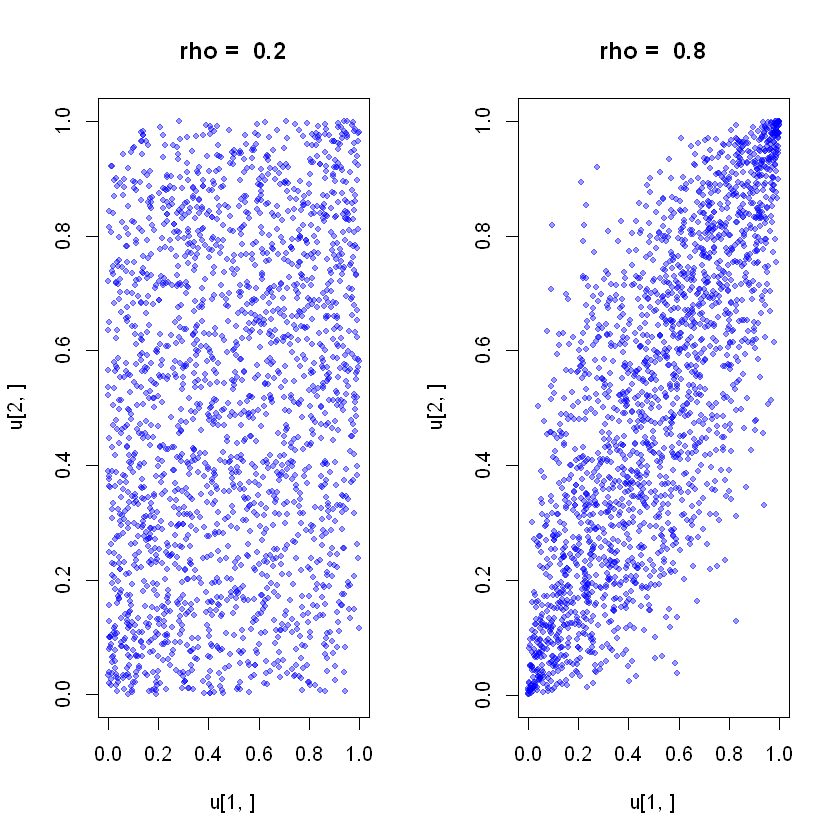

In [2]:
par(mfrow=c(1,2))
col <- rgb(0, 0, 1, alpha = 0.4)
for(rho in c(0.2, 0.8)) {
    cop <- cop_gauss(n = 2, rho = rho)
    u <- replicate(2000, cop$rand())
    plot(u[1,], u[2,], pch = 20, col = col, main = paste("rho = ", as.character(rho)))
}


On revient maintenant au problème des instants de défaut dont on rappelle que $\tau_i \sim \mathcal{E}(\lambda_i)$. On s'intéresse à la variable aléatoire 
$$
    X = \sum_{i = 1}^n \mathbf{1}_{\tau_i \le 1}
$$

Ecrire une fonction `randX` qui prend en argument une valeur de lambda ($\lambda_i = \lambda$ pour tout $i$) et un objet `"copule"` (liste renvoyée par la fonction `cop_gauss`) et qui renvoie une réalisation de $X$. Dans la suite, on prendra par exemple $\lambda = 0.4$

In [3]:
randX <- function(lambda, copule) {
    u <- copule$rand()
    tau <- qexp(u, rate = lambda)            
    return(sum(tau <= 1))   #lindicatrice
}

Créer un vecteur `list_rho` de taille 4 avec les valeurs $(0,0.2,0.6,0.8)$ et créer une matrice de 2000 lignes et 4 colonnes, dont chaque colonne est remplie par des simulations de $X$ pour une valeur de `rho` donnée:
```R
result <- matrix(nrow = 2000, ncol = 4)      # on stocke 2000 réalisations de X pour 4 valeurs de rho 
colnames(result) <- list_rho                 # on donne des noms aux colonnes pour faciliter l'accès
```
Remplir cette matrice avec réalisations de $X$ (via la fonction `randX`). Cette matrice sera utilisée dans la suite pour le calcul de la moyenne et le tracé des histogrammes.

Calculer (mathématiquement) $\mathbf{E}[X]$ en fonction de $\rho$ et vérifier ce résultat en calculant la moyenne empirique (fonction `mean`) de chaque colonne de la matrice `result` (vous pouvez faire une boucle `for` ou utiliser la fonction `apply`).

In [4]:
lambda <- c(0.4)
list_rho <- c(0, 0.2, 0.6, 0.8) 
result <- matrix(nrow = 2000, ncol = 4)      # on stocke 2000 réalisations de X pour 4 valeurs de rho 
colnames(result) <- list_rho                 # on donne des noms aux colonnes pour faciliter l'accès
for (rho in list_rho) {
    cop <- cop_gauss(n = 10, rho = rho)
    x <- replicate(nrow(result), randX(lambda, cop))
    result[,as.character(rho)] <- x
}

#valeur des moyennes empiriques
apply(result, 2, mean)
print(paste("valeur théorique:", cop$n*(1-exp(-lambda))))

0    0.2    0.6    0.8 
3.2930 3.2430 3.2885 3.4105

[1] "valeur théorique: 3.29679953964361"


Reproduire les graphes suivants qui illustrent la distribution empirique de $X$ en fonction de $\rho$ pour $\lambda = 0.4$ (la couleur correspond à `rgb(0,0,1,alpha=rho)` (c'est un bleu avec un niveau de transparence égal à la valeur $\rho$). 
Que peut-on déduire ? Faites varier $\lambda$ (et même prendre $\lambda$ un vecteur...) pour obtenir d'autres résultats.
![image](hist_defauts.png)
Les étudiants qui le souhaite peuvent aussi reproduire le graphe suivant qui s'obtient en utilisant l'option `beside = TRUE` de la fonction `barplot`.
![image](hist_defauts2.png)

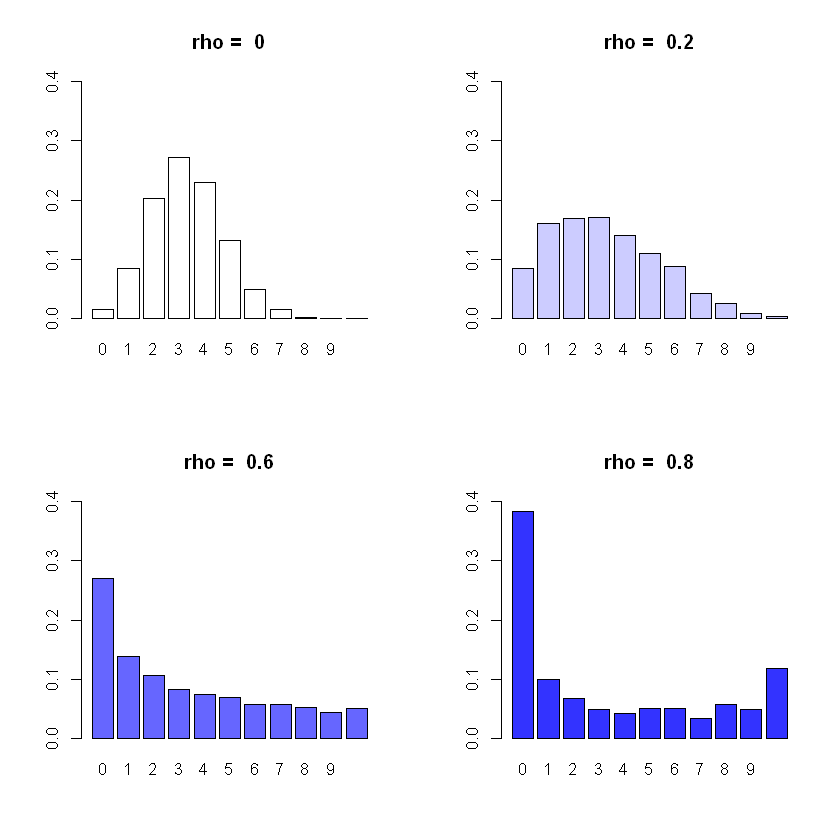

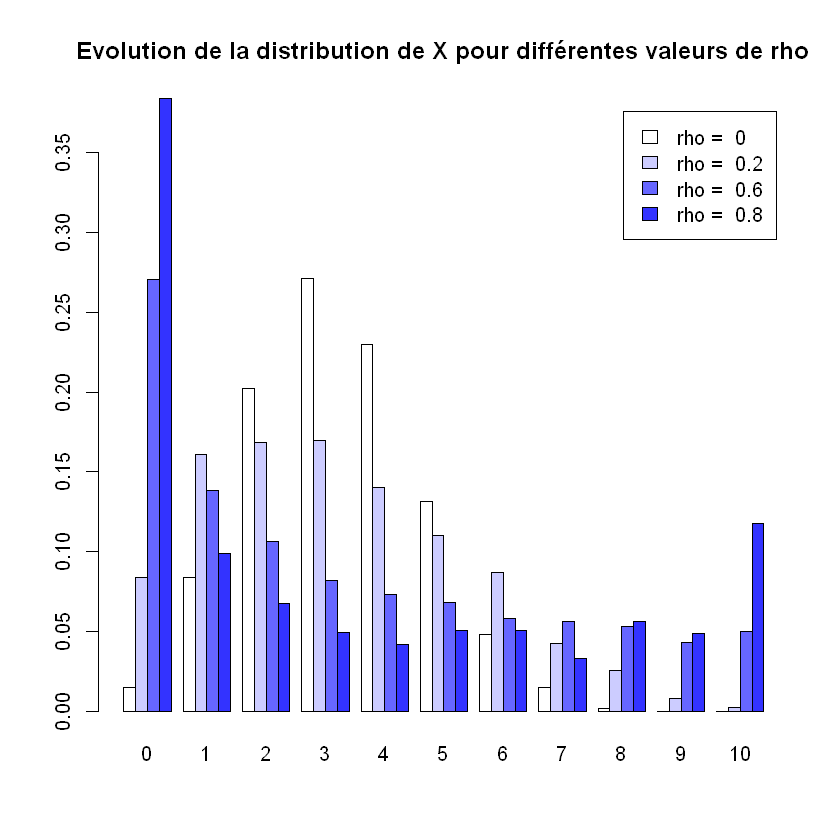

In [5]:

tables <- apply(result, 2, function(x) table(factor(x, 0:10)) / length(x)) #apply
# fonction factor(x, 0:10) x à valeurs dans 0,1,...,10. 

    
#premier graphe
par(mfrow=c(2,2))
for (i in 1:ncol(tables)) {
    barplot(tables[,i], col = rgb(0,0,1,list_rho[i]), ylim = c(0,0.4), main = paste("rho = ", list_rho[i]))
}

# second graphe
par(mfrow=c(1,1))
barplot(t(tables), col = rgb(0,0,1,list_rho), beside = TRUE, legend = paste("rho = ", list_rho), 
        main = "Evolution de la distribution de X pour différentes valeurs de rho")


# Simulation d'une chaîne de Markov: Urnes d'Ehrenfest

On considère $d$ balles ($d > 1$) numérotées de 1 à $d$ et réparties dans deux urnes $A$ et $B$. L'état initial des urnes est de $X_0$ balles dans l'urne $A$ et donc de $d-X_0$ balles dans l'urne $B$. Un changement d'état est modélisé de la façon suivante: "_on tire un numéro de balle selon la loi uniforme sur $\{1,2,\dots,d\}$ et à un tirage $i$ on déplace la balle numéro $i$ d'une urne à l'autre_".

Le nombre de balles dans l'urne $A$ après $n$ changement d'états est noté $X_n$ et la chaîne de Markov $(X_n)_{n \ge 0}$ est appelée _chaîne d'Ehrenfest_.

Dans un premier temps on propose de programmer une version "naïve" de la dynamique en considérant un état qui est une liste composée d'un entier `d` qui correspond au nombre total de balles, d'un vecteur `A` qui contient les numéros des balles de l'urne $A$ et d'un vecteur `B` pour les numéros des balles de $B$. Par exemple, on considère l'état initial:
```R
init_state <- list(d = 40, A = 1:10, B = 11:40)
```

Programmer une fonction `Ehrenfest_dynamique` qui prend un état et renvoie un nouvel état possible après 1 tirage (on pourra utiliser la fonction `setdiff` pour supprimer une boule).

Une fois cette fonction écrite et testée, tracer l'histogramme empirique (en utilisant 5000 réalisations) des valeurs prises par $X_n$ pour $n = 100$. 

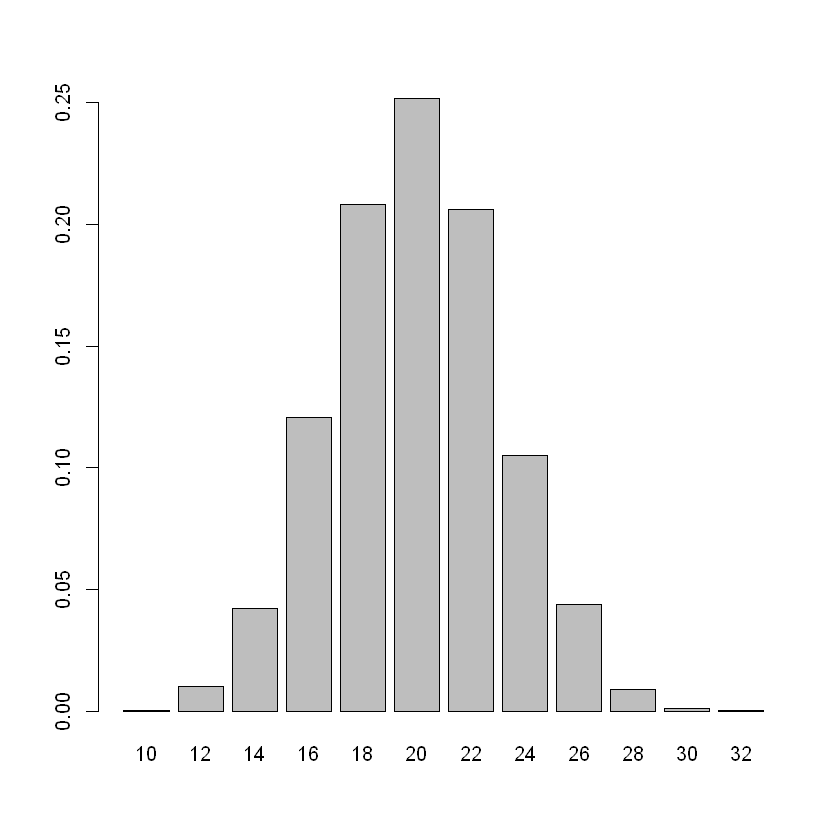

In [6]:
Ehrenfest_dynamique <- function(state) {
    i <- sample(state$I, size = 1)
    if (i %in% state$A) { 
        state$A <- setdiff(state$A, i)
        state$B <- c(state$B, i)
    } else {
        state$B <- setdiff(state$B, i)
        state$A <- c(state$A, i)
    }
    return(state)
}

# on simule 1 realisation de la chaine de Markov
Ehrenfest_realisation <- function(state, n) {
    for (k in 1:n) {
        state <- Ehrenfest_dynamique(state)
    }
    return(length(state$A))  #on renvoie X_n
}

init_state <- list(I = 1:40, A = 1:10, B = 11:40)
x <- replicate(5000, Ehrenfest_realisation(init_state, 100))
barplot(table(x) / length(x))

Déterminer la matrice de transition $P$ de la chaîne $(X_n)_{n \ge 0}$.

Ecrire une fonction `Ehrenfest_transition` qui prend un état $X_n = x \in \{1,\dots,d\}$ et qui renvoie l'état suivant $X_{n+1}$ selon la matrice de transition $P$. Reproduire l'histogramme précédent et comparer les temps d'execution. 

Sur quelles valeurs se concentrent la loi de $X_n$ si $n$ est pair ? et si $n$ est impair ?

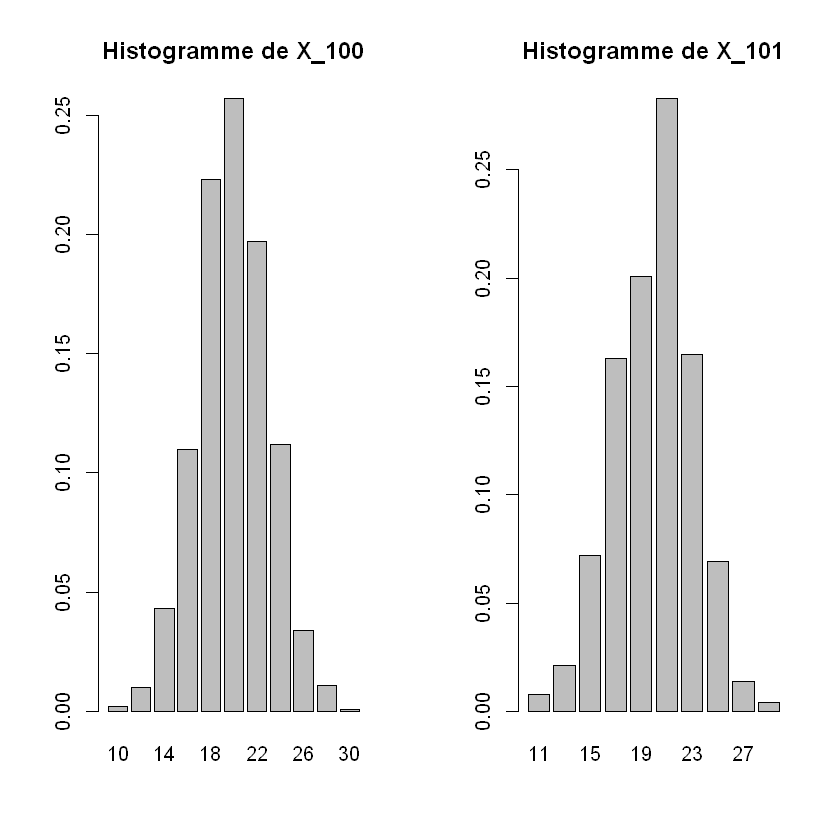

In [7]:
x_0 <- 10
Ehrenfest_transition <- function(x_n) {
    if (x_n == 0) return(1)
    if (x_n == d) return(d-1)                   
    delta <- sample(c(-1, +1), 1, prob = c(x_n/d, (d-x_n)/d))
    return(x_n + delta) #x_n+1
}

Ehrenfest_realisation <- function(x, n) {
    for (k in 1:n) {
        x <- Ehrenfest_transition(x)
    }
    return(x)
}

par(mfrow=c(1,2))
d <- 40
x <- replicate(1000, Ehrenfest_realisation(x_0, 100))    #pair 
barplot(table(x) / length(x), main="Histogramme de X_100")
x <- replicate(1000, Ehrenfest_realisation(x_0, 101))    #impair 
barplot(table(x) / length(x), main="Histogramme de X_101")

On modifie un peu la modélisation précédente en considérant la règle suivante: "_on tire un numéro de balle selon la loi uniforme sur $\{1,2,\dots,d\}$ et à un tirage $i$ on déplace la balle numéro $i$ d'une urne à l'autre __avec probabilité 1/2___".

Ecrire la matrice de transition et reprendre la question précédente.

Montrer que si $X_0 \sim B\bigl(d, \frac{1}{2}\bigr)$ (loi binomiale) alors $X_1 \sim B\bigl(d, \frac{1}{2}\bigr)$. 
Comparer cette loi binomiale avec l'histogramme empirique de la loi $X_n$ pour $n$ grand (par exemple $n = 100$).

# Simulation d'un processus de Poisson

## Première approche: processus de comptage
On considère un processus de Poisson de paramètre $\lambda > 0$, c'est à dire un processus de comptage associé à un processus ponctuel $(T_n)_{n \ge 1}$ où les variables aléatoires $T_n$ (appelées instants de sauts) sont définies par 
$$
    \forall n \ge 1, \quad T_n - T_{n-1} = S_n, \qquad \text{en posant $T_0 = 0$}
$$
avec $(S_n)_{n \ge 1}$ suite _i.i.d._ de loi exponentielle de paramètre $\lambda > 0$.

Pour tout $t \ge 0$, on définit 
$$
    N_t = \sum_{n \ge 0} \mathbf{1}_{T_n \le t},
$$
et on veut simuler une trajectoire de $(N_t)_{t \in [0,T]}$ pour un horizon $T > 0$ fixé. 

Reproduire le graphe ci-dessous.
![image](poisson.png)

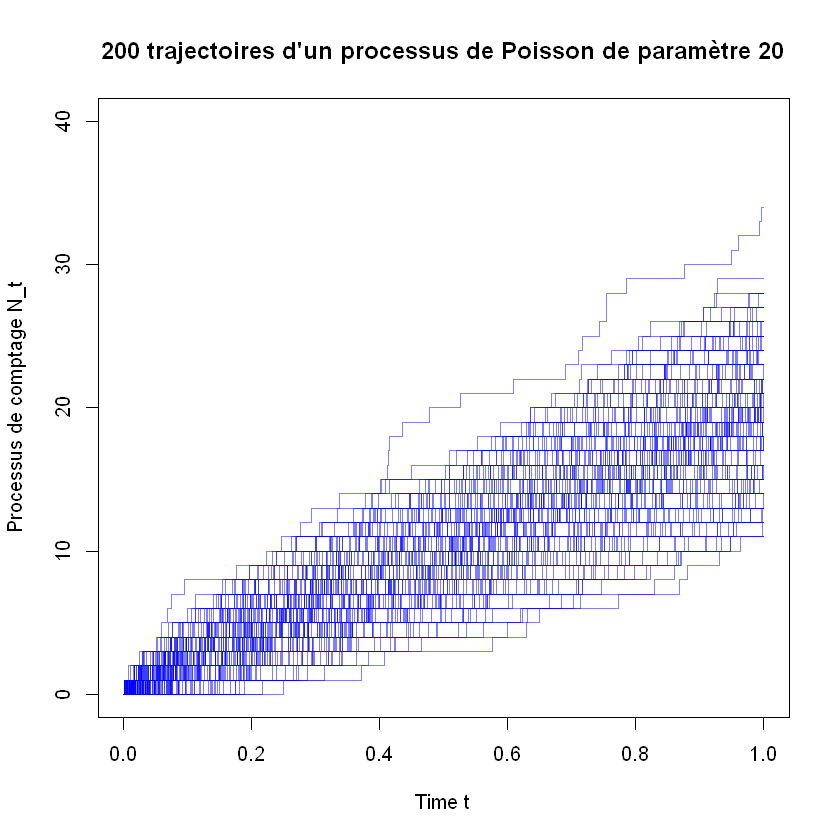

In [8]:
Npaths <- 200
lambda <- 20
T <- 1
plot(NULL, xlim=c(0,T), ylim=c(0,2*lambda), xlab="Time t", ylab="Processus de comptage N_t",
     main = paste(Npaths, "trajectoires d'un processus de Poisson de paramètre", lambda))

# boucle for et d'une boucle while
for (k in 1:Npaths) {
    T_n <- 0
    path <- 0
    while (T_n < T) {
        T_n <- T_n + rexp(1, lambda)
        if (T_n < T) path <- c(path, T_n)
    }
    N_T <- length(path)-1
    N <- 0:N_T

    # on ajoute le point (T, N_T)    
    path <- c(path, T)
    N <- c(N, N_T)
    
    lines(path, N, type="s", col=rgb(0,0,1,alpha=0.5))
}


## Seconde approche: conditionnement par la loi de Poisson
On rappelle que si $(N_t)_{t \ge 0}$ est un processus de Poisson d'intensité $\lambda > 0$, alors conditionnelement à l'événement $N_T = n$ les instants de sauts $(T_k)_{k=1,\dots,n}$ (tels que $0 < T_1 < \dots < T_n \le T$) ont même loi que le réordonnement croissant d'un vecteur $(U_1, \dots, U_n) \sim \mathcal{U}([0,T]^n)$.

En utilisant cette propriété, simuler une trajectoire du processus de Poisson puis reproduire le graphes des 200 trajectoires.

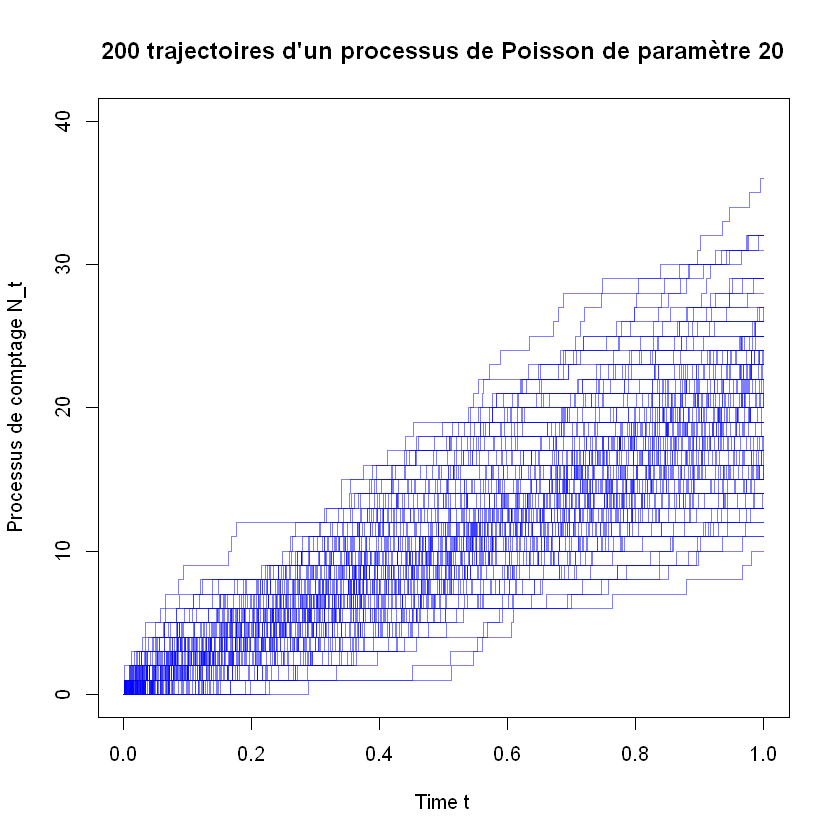

In [9]:
Npaths <- 200
lambda <- 20
T <- 1
plot(NULL, xlim=c(0,T), ylim=c(0,2*lambda), xlab="Time t", ylab="Processus de comptage N_t",
     main = paste(Npaths, "trajectoires d'un processus de Poisson de paramètre", lambda))

for (k in 1:Npaths) {
    N_T <- rpois(1, lambda*T)
    T_n <- runif(N_T, min = 0, max = T)
    T_n <- c(0, sort(T_n), T)
    lines(T_n, c(0:N_T, N_T), type="s", col=rgb(0,0,1,alpha=0.5))
}

#code plus court 

# Processus de Poisson inhomogène
Soit $\lambda:[0,+\infty[ \to ]0, +\infty[$ une fonction strictement positive, appelée fonction d'intensité. On considère maintenant des instants de sauts $(T_n)_{n \ge 1}$ (avec toujours $T_0 = 0$) donnés par la dynamique $T_{n} = T_{n-1} + S_n$ où pour tout $n \ge 1$, $S_n$ est une variable aléatoire sur $]0,+\infty[$ définie conditionnellement à $T_{n-1}$ par 
$$
    \begin{aligned}
    \forall s > 0, \forall t_{n-1} > 0, \quad
    \mathbf{P} \bigl[S_n > s \; \bigl\vert \; T_{n-1} = t_{n-1} \bigr] &= \exp \bigl(-\int_0^s \lambda(u + t_{n-1}) d u \bigr) \\
      &= \exp \bigl(- (\Lambda(t_{n-1} + s) - \Lambda(t_{n-1})) \bigr) \\
    \end{aligned}
$$
avec $\Lambda(t) = \int_0^t \lambda(u) d u$ l'intensité intégrée. Dans la suite on note $\Lambda^{-1}$ la réciproque de $\Lambda$.

### Simulation par inverse de l'intensité intégrée
Montrer que si $E \sim \mathcal{E}(1)$ et que $t_{n-1}$ est fixé, alors la variable aléatoire $X = \Lambda^{-1}\bigl(E + \Lambda(t_{n-1})\bigr) - t_{n-1}$ vérifie 
$$ 
    \forall s > 0, \quad 
    \mathbf{P} \bigl[X > s \bigr] = \exp \bigl(- (\Lambda(t_{n-1} + s) - \Lambda(t_{n-1})) \bigr),
$$
en déduire une méthode de simulation des instants de sauts $(T_n)_{n \ge 1}$ et du processus de comptage associé (appelé processus de Poisson inhomogène de fonction d'intensité $\lambda$).

Tester cette méthode avec la fonction d'intensité $\lambda(t) = 0.1 + 5t$.

### Simulation par la méthode des sauts fictifs (thinning)
On suppose maintenant que la fonction d'intensité est bornée 
$$
    \exists \bar \lambda > 0, \quad \forall t \ge 0, \quad \lambda(t) \le \bar \lambda.
$$
Soit $(\bar T_n)_{n \ge 1}$ les instants de sauts d'un processus de poisson $(\bar N_t)_{t \ge 0}$ d'intensité $\bar \lambda$. On peut simuler les instants de sauts $(T_n)_{n \ge 1}$ en supprimant certains sauts de $(\bar T_n)_{n \ge 1}$. Plus précisément, on considère $(U_n)_{n \ge 1}$ une suite _i.i.d._ de loi uniforme sur $[0,1]$ et on construit la suite d'indices $(\tau_n)_{n \ge 1}$ par la récurrence
$$
     \forall n \ge 0, \quad \tau_{n+1} = 
     \min \Bigl\{ k > \tau_n, U_k \le \frac{\lambda(\bar T_k)}{\bar \lambda} \Bigr\}
     \qquad \tau_0 = 0
$$
Alors les sauts de $(\bar N_t)_{t \ge 0}$ d'indices $(\tau_n)_{n \ge 1}$ sont les sauts d'un processus de Poisson inhomogène de fonction d'intensité $\lambda$. On peut alors construire $(T_n)_{n \ge 1}$ en posant $T_n = \bar T_{\tau_n}$.